<a href="https://colab.research.google.com/github/Saisathwika-08/Generative-AI/blob/main/2303A52204_week9_ASS(9.1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Design a multilayer ANN architecture to identify the hand-written digits using the
Keras deep learning library. Consider the MNIST data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adadelta
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score





(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

2) Calculate the accuracy with training and testing data

In [3]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
train_accuracy = history.history['accuracy'][-1]
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0829 - loss: 2.3080 - val_accuracy: 0.0918 - val_loss: 2.3012
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0970 - loss: 2.2994 - val_accuracy: 0.1132 - val_loss: 2.2921
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1233 - loss: 2.2891 - val_accuracy: 0.1399 - val_loss: 2.2833
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1510 - loss: 2.2804 - val_accuracy: 0.1697 - val_loss: 2.2747
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1815 - loss: 2.2724 - val_accuracy: 0.2029 - val_loss: 2.2662
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2092 - loss: 2.2645 - val_accuracy: 0.2359 - val_loss: 2.2577
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2459 - loss: 2.2550 - val_accuracy: 0.2642 - val_loss: 2.2490
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2752 - loss: 2.2468 - val_accuracy: 0.

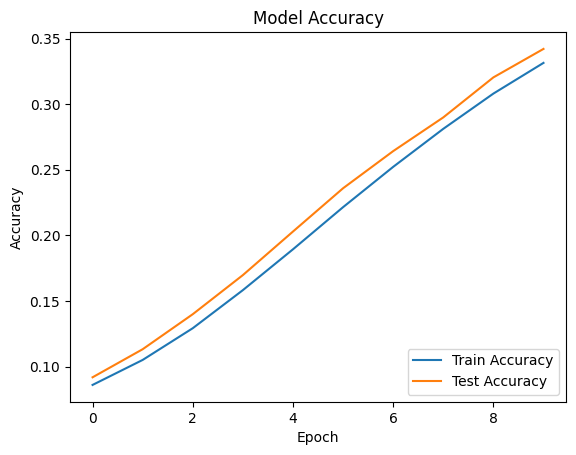

In [4]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


 3) Also, change the architecture by tuning no. of hidden layers, no. of hidden neurons and activation functions in hidden layer. Identify best architecture in terms of testing accuracy Tabela 1: ANN Architecture Layer Neurons Activation Function Hidden Layer - 1 32 relu Hidden Layer - 2 32 relu Hidden Layer - 3 32 relu Tabela 2: Training Parameters epochs batch size error metric Optimizer 10 128 accuracy adadelta Dataset: MNIST

In [6]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28, 28, 1)))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])


history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


train_accuracy_2 = history_2.history['accuracy'][-1]
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Reduced Neurons): {train_accuracy_2 * 100:.2f}%')
print(f'Testing Accuracy (Reduced Neurons): {test_accuracy_2 * 100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1137 - loss: 2.3304 - val_accuracy: 0.1184 - val_loss: 2.3218
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1153 - loss: 2.3202 - val_accuracy: 0.1232 - val_loss: 2.3116
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1192 - loss: 2.3111 - val_accuracy: 0.1313 - val_loss: 2.3020
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1238 - loss: 2.3018 - val_accuracy: 0.1395 - val_loss: 2.2932
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1294 - loss: 2.2937 - val_accuracy: 0.1477 - val_loss: 2.2852
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1385 - loss: 2.2863 - val_accuracy: 0.1578 - val_loss: 2.2779
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1479 - loss: 2.2781 - val_accuracy: 0.1665 - val_loss: 2.2711
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1573 - loss: 2.2717 - val_accuracy: 0.

In [7]:

model_3 = Sequential()
model_3.add(Flatten(input_shape=(28, 28, 1)))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy_3 = history_3.history['accuracy'][-1]
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Increased Neurons): {train_accuracy_3 * 100:.2f}%')
print(f'Testing Accuracy (Increased Neurons): {test_accuracy_3 * 100:.2f}%')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1103 - loss: 2.2984 - val_accuracy: 0.1305 - val_loss: 2.2779
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1301 - loss: 2.2786 - val_accuracy: 0.1599 - val_loss: 2.2559
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1604 - loss: 2.2558 - val_accuracy: 0.1961 - val_loss: 2.2335
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1934 - loss: 2.2339 - val_accuracy: 0.2397 - val_loss: 2.2104
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2360 - loss: 2.2106 - val_accuracy: 0.2833 - val_loss: 2.1863
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2839 - loss: 2.1863 - val_accuracy: 0.3256 - val_loss: 2.1612
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3168 - loss: 2.1631 - val_accuracy: 0.3608 - val_loss: 2.1349
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3583 - loss: 2.1346 - val_accuracy: 0.

In [8]:

model_4 = Sequential()
model_4.add(Flatten(input_shape=(28, 28, 1)))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])


history_4 = model_4.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


train_accuracy_4 = history_4.history['accuracy'][-1]
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy (Sigmoid Activation): {train_accuracy_4 * 100:.2f}%')
print(f'Testing Accuracy (Sigmoid Activation): {test_accuracy_4 * 100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1006 - loss: 2.5247 - val_accuracy: 0.1010 - val_loss: 2.5198
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1012 - loss: 2.5138 - val_accuracy: 0.1010 - val_loss: 2.5086
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1018 - loss: 2.5067 - val_accuracy: 0.1010 - val_loss: 2.4971
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1018 - loss: 2.4890 - val_accuracy: 0.1010 - val_loss: 2.4859
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1024 - loss: 2.4798 - val_accuracy: 0.1010 - val_loss: 2.4750
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1042 - loss: 2.4704 - val_accuracy: 0.1010 - val_loss: 2.4648
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1010 - loss: 2.4619 - val_accuracy: 0.1010 - val_loss: 2.4550
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1041 - loss: 2.4496 - val_accuracy: 0.

In [9]:
print(f'Original Architecture Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Reduced Neurons Test Accuracy: {test_accuracy_2 * 100:.2f}%')
print(f'Increased Neurons Test Accuracy: {test_accuracy_3 * 100:.2f}%')
print(f'Sigmoid Activation Test Accuracy: {test_accuracy_4 * 100:.2f}%')

Original Architecture Test Accuracy: 34.21%
Reduced Neurons Test Accuracy: 19.94%
Increased Neurons Test Accuracy: 44.25%
Sigmoid Activation Test Accuracy: 10.10%


In [10]:
model.save('best_mnist_model.h5')
print("Best model saved as 'best_mnist_model.h5'")

Best model saved as 'best_mnist_model.h5'
